## Hypothesis: High number of pregnancies cause a higher risk of diabetes at greater age

DV: Outcomes
IV: pregnancies, age


In [ ]:
## Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import stan
import csv

In [109]:
from sklearn.model_selection import train_test_split

In [298]:
from sklearn.linear_model import LogisticRegression

In [2]:
import nest_asyncio #this library is important to use pystan

nest_asyncio.apply()

In [3]:
import scipy.stats as stats

In [4]:
## import data

df = pd.read_csv('../db/diabetes.csv')

In [108]:
df.head(100)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
95,6,144,72,27,228,33.9,0.255,40,0
96,2,92,62,28,0,31.6,0.130,24,0
97,1,71,48,18,76,20.4,0.323,22,0
98,6,93,50,30,64,28.7,0.356,23,0


In [328]:
df[df['Pregnancies'] == 17]['Age']

159    47
Name: Age, dtype: int64

In [200]:
## Pregnancies: Number of times pregnant
## Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
## BloodPressure: Diastolic blood pressure (mm Hg)
## SkinThickness: Triceps skin fold thickness (mm)
## Insulin: 2-Hour serum insulin (mu U/ml)
## BMI: Body mass index (weight in kg/(height in m)2)
## DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
## A function that determines the risk of type 2 diabetes based on family history, 
## the larger the function, the higher the risk of type 2 diabetes.
## Age: Age (years)
## Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

In [32]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/var/folders/37/wj6jtm190bz4csmcwzcscp440000gn/T/ipykernel_8904/671287254.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.DiabetesPedigreeFunction,color='r', ax = ax1)
/var/folders/37/wj6jtm190bz4csmcwzcscp440000gn/T/ipykernel_8904/671287254.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

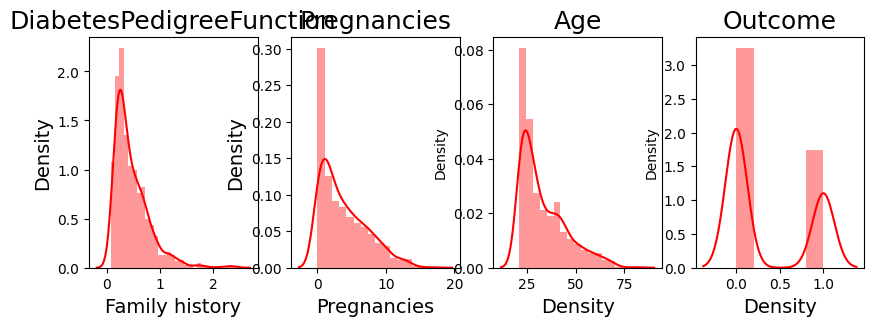

In [201]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 3))  # Adjust the size as needed
sns.distplot(df.DiabetesPedigreeFunction,color='r', ax = ax1)
ax1.set_title('DiabetesPedigreeFunction',size=18)
ax1.set_xlabel('Family history',size=14)
ax1.set_ylabel('Density',size=14)

sns.distplot(df.Pregnancies,color='r', ax = ax2)
ax2.set_title('Pregnancies',size=18)
ax2.set_xlabel('Pregnancies',size=14)
ax2.set_ylabel('Density',size=14)

sns.distplot(df.Age,color='r', ax = ax3)
ax3.set_title('Age',size=18)
ax3.set_xlabel('Density',size=14)

sns.distplot(df.Outcome,color='r', ax = ax4)
ax4.set_title('Outcome',size=18)
ax4.set_xlabel('Density',size=14)
plt.show()

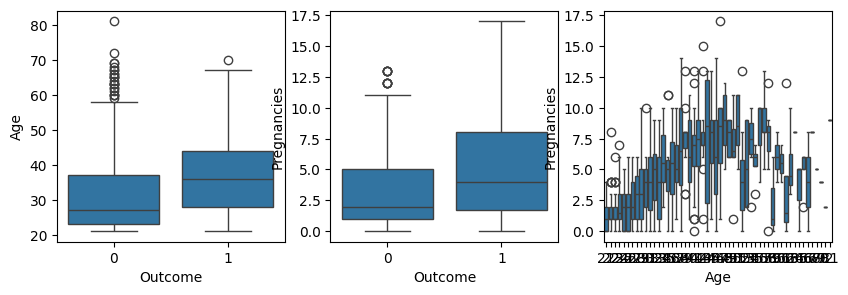

In [321]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))
sns.boxplot(data=df, ax = ax1, x='Outcome', y='Age')
sns.boxplot(data=df, ax = ax2, x='Outcome', y='Pregnancies')
sns.boxplot(data=df, ax = ax3, x='Age', y='Pregnancies')
plt.show()

When I plot the data in conjunction with outcome, it shows people who have diabetes tend to have high average of age and the number of time of pregnant. \

<Axes: >

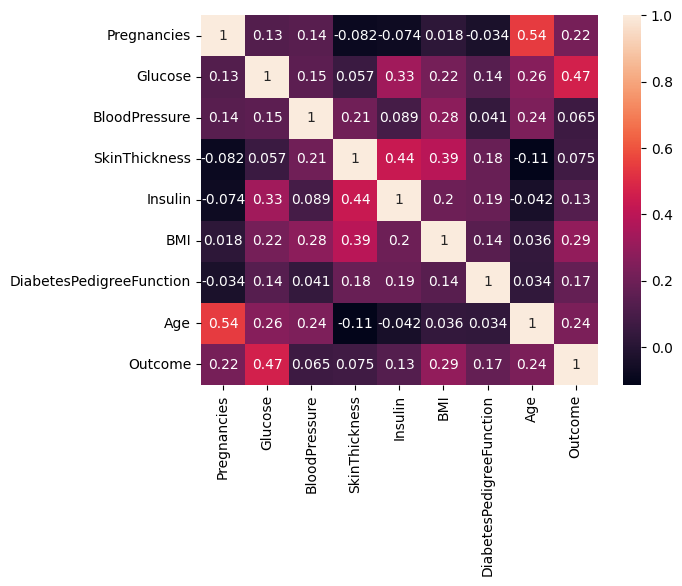

In [198]:
sns.heatmap(df.corr(),annot=True)

According to the general plots, diabetesPedigreeFunction, Pregnancies, and Age shows skewed distribution.\
To confirm the hypothesis, I will use pregnancies, age, and outcome. 
In particular, outcome is binary data (0, 1), I will develop logistic regression that shows correlation between pregnancies, age, and outcome.

other ways to decide prior 
commet: seperate dataset into two parts (test, train data) \
--> set the bar (like until this bar, I will keep observe posterior result -> prior), then make predictions \
--> how I can make sure this is the valid priors? (up to the hypothesis) \
--> try train dataset flatten \


In [1]:
train, test = train_test_split(df, test_size=0.3)

NameError: name 'train_test_split' is not defined

In [358]:
train_factor = train[['Age']]
train_y = train[['Outcome']]

In [359]:
model = LogisticRegression()
model.fit(train_factor, train_y)

## beta
print(model.coef_) 
## alpha
print(model.intercept_)

[[0.04258964]]
[-2.08267149]


/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In the frequentist test, the linear regression shows the coefficient and intercept are 0.0111m 0.0091 and 0.25 respectively.

### First iteration

1. How would the number of pregnancies directly affect diabetes? 
   - what is the likelihood of it?
2. Would the number of pregnancies  without age affect diabetes?
   - what is the likelihood of it?


First, in order to understand the effect of pregnancies on outcome, I developed simple logistic regression which has pregnancies as IV. In this model, I put all beta and alpha as uniform, flatten distribution. 

In [284]:
## normal distribution
## default flat prior

stan_code = """

data {
int<lower=0> N;
int<lower = 0, upper = 1> y[N];
vector[N] pregnancies;
}


parameters {

//declare parameters that will be estimated

real alpha;
real beta_preg;
}

model {
// Declare your probability model: priors, hyperpriors & likelihood

///prior 

vector[N] p;
p = pregnancies * beta_preg + alpha;

//likelihood
y ~ bernoulli_logit(p);
}

generated quantities {
//predictive posterior check

int<lower = 0, upper = 1> y_rep[N];

for(n in 1:N){

y_rep[n] = bernoulli_logit_rng(pregnancies[n] * beta_preg + alpha);

}
}
"""

In [285]:
## train
train_data = {
"N": len(train), 
"pregnancies": train["Pregnancies"].values,
"y": train["Outcome"].values,   
}

In [286]:
## choose prior -> normal distribution is not a good answer 
## whatever how you think, subjective, we need to have assumption, 
## picking distribution of our belief about the values 

In [287]:
stan_model = stan.build(stan_code, data=train_data)

Building: 0.4s
Building: 0.5s
Building: 0.6s
Building: 0.7s
Building: 0.8s
Building: 0.9s
Building: 1.0s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.4s
Building: 1.5s
Building: 1.6s
Building: 1.7s
Building: 1.8s
Building: 1.9s
Building: 2.0s
Building: 2.1s
Building: 2.2s
Building: 2.3s
Building: 2.4s
Building: 2.6s
Building: 2.7s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/6jcykxwk/model_6jcykxwk.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/chainable_object.hpp:6:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/typedefs.hpp:7:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-pac

Building: 2.8s
Building: 2.9s
Building: 3.0s
Building: 3.1s
Building: 3.2s
Building: 3.3s
Building: 3.4s
Building: 3.5s
Building: 3.6s
Building: 3.7s
Building: 3.8s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/6jcykxwk/model_6jcykxwk.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:26:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/beta.hpp:70:32: warning: lambda capture 'b' is not used [-Wunused-lambda-capture]
                           [a, b, digamma_ab](auto& vi) mutable {
                             ~~^


Building: 3.9s
Building: 4.0s
Building: 4.1s
Building: 4.2s
Building: 4.3s
Building: 4.4s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/6jcykxwk/model_6jcykxwk.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:55:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/

Building: 4.5s
Building: 4.6s
Building: 4.7s
Building: 4.8s
Building: 4.9s
Building: 5.0s
Building: 5.2s
Building: 5.3s
Building: 5.4s
Building: 5.5s
Building: 5.6s
Building: 5.7s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/6jcykxwk/model_6jcykxwk.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:198:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor.hpp:12:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor/hcubature.hpp:468:7: warning: unused variable 'kdiv' [-Wunused-variable]
  int kdiv = kdivide;
      ^


Building: 5.8s
Building: 5.9s
Building: 6.1s
Building: 6.2s
Building: 6.3s
Building: 6.4s
Building: 6.5s
Building: 6.6s
Building: 6.7s
Building: 6.8s
Building: 6.9s
Building: 7.0s
Building: 7.1s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/6jcykxwk/model_6jcykxwk.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:198:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor.hpp:15:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor/integrate_ode_rk45.hpp:6:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-

Building: 7.2s
Building: 7.3s
Building: 7.4s
Building: 7.5s
Building: 7.7s
Building: 7.8s
Building: 7.9s
Building: 8.0s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/6jcykxwk/model_6jcykxwk.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:14:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:128:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/gaussian_dlm_obs_rng.hpp:98:7: warning: unused variable 'n' [-Wunused-variable]
  int n = G.rows();  // number of states
      ^


Building: 8.1s
Building: 8.2s
Building: 8.3s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/6jcykxwk/model_6jcykxwk.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:14:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:210:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/multi_student_t_log.hpp:5:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan

Building: 8.4s
Building: 8.5s
Building: 8.6s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/6jcykxwk/model_6jcykxwk.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:14:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:312:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/skew_double_exponential_ccdf_log.hpp:5:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan

Building: 8.7s
Building: 8.8s


/Users/eunkang/Library/Caches/httpstan/4.10.1/models/6jcykxwk/model_6jcykxwk.cpp:179:20: warning: unused variable 'jacobian__' [-Wunused-variable]
    constexpr bool jacobian__ = false;
                   ^
/Users/eunkang/Library/Caches/httpstan/4.10.1/models/6jcykxwk/model_6jcykxwk.cpp:235:11: warning: variable 'pos__' set but not used [-Wunused-but-set-variable]
      int pos__ = std::numeric_limits<int>::min();
          ^
/Users/eunkang/Library/Caches/httpstan/4.10.1/models/6jcykxwk/model_6jcykxwk.cpp:266:11: warning: variable 'pos__' set but not used [-Wunused-but-set-variable]
      int pos__ = std::numeric_limits<int>::min();
          ^


Building: 8.9s
Building: 9.0s
Building: 9.1s
Building: 9.2s
Building: 9.4s
Building: 9.5s
Building: 9.6s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/6jcykxwk/model_6jcykxwk.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:55:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/

Building: 9.7s
Building: 9.8s
Building: 9.9s
Building: 10.0s
Building: 10.1s


/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp:192:12: warning: unused variable 'pre_mult' [-Wunused-variable]
      auto pre_mult = a2 * pow(1 - z, -1 - a2);
           ^
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp:307:20: note: in instantiation of function template specialization 'stan::math::internal::grad_2F1_impl<true, true, true, true, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, std::tuple<stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>>>' requested here
  return internal::grad_2F1_impl<true, true, true, true>(a1, a2, b1, z,
                   ^
In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/6jcykxwk/model_6jcykxwk.cpp:2:
In file i

Building: 10.2s
Building: 10.3s
Building: 10.4s
Building: 10.5s
Building: 10.6s
Building: 10.7s
Building: 10.8s
Building: 10.9s
Building: 11.0s
Building: 11.1s
Building: 11.2s
Building: 11.3s
Building: 11.4s
Building: 11.5s
Building: 11.6s
Building: 11.7s
Building: 11.8s
Building: 11.9s
Building: 12.0s
Building: 12.1s
Building: 12.2s
Building: 12.3s
Building: 12.5s
Building: 12.6s
Building: 12.7s
Building: 12.8s
Building: 12.9s
Building: 13.0s
Building: 13.1s
Building: 13.2s
Building: 13.3s
Building: 13.4s
Building: 13.5s
Building: 13.6s
Building: 13.7s
Building: 13.8s
Building: 13.9s
Building: 14.0s
Building: 14.1s
Building: 14.2s
Building: 14.3s
Building: 14.4s
Building: 14.5s
Building: 14.6s
Building: 14.7s
Building: 14.9s
Building: 15.0s
Building: 15.1s
Building: 15.2s
Building: 15.3s
Building: 15.4s
Building: 15.5s


21 warnings generated.
ld: warning: object file (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/stan_services.o) was built for newer macOS version (11.0) than being linked (10.9)
ld: warning: dylib (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libtbb.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: dylib (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libtbbmalloc_proxy.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: dylib (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libtbbmalloc.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: object file (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libsundials_nvecserial.a(nvector_serial.o)) was built for newer macOS version (11.0) than being linked (10.9)
ld: warning: ob

Building: 15.5s, done.
Messages from stanc:
Warning in '/var/folders/37/wj6jtm190bz4csmcwzcscp440000gn/T/httpstan_ul8y0js7/model_6jcykxwk.stan', line 5, column 0: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/var/folders/37/wj6jtm190bz4csmcwzcscp440000gn/T/httpstan_ul8y0js7/model_6jcykxwk.stan', line 33, column 0: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.33.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


In [187]:
## Based on parameter updated, now we will estimate model by simulating data 

In [288]:
fit = stan_model.sample(num_chains=4, num_samples=1000, num_warmup=500) 
## posterior: Stan generates samples from the joint posterior distribution of the parameters

Sampling:   0%
Sampling:  25% (1500/6000)
Sampling:  50% (3000/6000)
Sampling:  75% (4500/6000)
Sampling: 100% (6000/6000)
Sampling: 100% (6000/6000), done.
Messages received during sampling:
  Gradient evaluation took 0.001907 seconds
  1000 transitions using 10 leapfrog steps per transition would take 19.07 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.00189 seconds
  1000 transitions using 10 leapfrog steps per transition would take 18.9 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001903 seconds
  1000 transitions using 10 leapfrog steps per transition would take 19.03 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001939 seconds
  1000 transitions using 10 leapfrog steps per transition would take 19.39 seconds.
  Adjust your expectations accordingly!


In [289]:
fit.to_frame()

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_preg,y_rep.1,...,y_rep.528,y_rep.529,y_rep.530,y_rep.531,y_rep.532,y_rep.533,y_rep.534,y_rep.535,y_rep.536,y_rep.537
draws,,,,,,,,,,,,,,,,,,,,,
0,-338.810884,0.990507,0.528853,3.0,7.0,0.0,338.967730,-1.064903,0.121143,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-340.744752,0.966157,0.502289,1.0,3.0,0.0,342.184436,-1.358748,0.159631,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-339.992684,0.913570,0.426327,3.0,7.0,0.0,341.610747,-0.965070,0.125776,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,-341.888873,1.000000,0.488664,1.0,1.0,0.0,343.427695,-0.783501,0.100534,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-339.162539,0.918150,0.528853,3.0,7.0,0.0,340.541191,-0.964116,0.110063,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-342.472441,0.952400,0.488664,2.0,3.0,0.0,342.536900,-0.743769,0.044911,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3996,-339.362058,1.000000,0.528853,3.0,7.0,0.0,341.607168,-1.032545,0.129967,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3997,-339.519490,1.000000,0.502289,1.0,1.0,0.0,339.771925,-1.183257,0.149761,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [270]:
summary1 = az.summary(fit) #https://python.arviz.org/en/stable/getting_started/Introduction.html

In [271]:
summary1

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-1.076,0.143,-1.33,-0.786,0.004,0.003,1169.0,1391.0,1.0
beta_preg,0.118,0.027,0.07,0.170,0.001,0.001,1182.0,1384.0,1.0
y_rep[0],0.347,0.476,0.00,1.000,0.008,0.006,3667.0,3667.0,1.0
y_rep[1],0.254,0.435,0.00,1.000,0.007,0.005,3930.0,3930.0,1.0
y_rep[2],0.316,0.465,0.00,1.000,0.007,0.005,3986.0,3986.0,1.0
...,...,...,...,...,...,...,...,...,...
y_rep[532],0.277,0.448,0.00,1.000,0.008,0.005,3558.0,3558.0,1.0
y_rep[533],0.321,0.467,0.00,1.000,0.007,0.005,3954.0,3954.0,1.0
y_rep[534],0.312,0.463,0.00,1.000,0.008,0.005,3792.0,3792.0,1.0
y_rep[535],0.536,0.499,0.00,1.000,0.008,0.006,3954.0,3954.0,1.0


When we draw samples using MCMC, this is the mean assorting all given simulated alpha and beta_preg from each draw.
y_rep: MCMC sampling method generate samples (parameters) that corresponds exactly to its posterior probability. This gives us representative samples. The below result indicates that how MCMC sampling predicts alpha and beta(pregnancy) parameters. 
The mean results of alpha and beta_preg is similar as frequentist test results.

- cite: Franke, M., & Roettger, T. B. (2019). Bayesian regression modeling (for factorial designs): A tutorial.

In [290]:
stan_data_simu_v1 = az.from_pystan(
    posterior=fit,
    posterior_predictive="y_rep",
    observed_data=["y"],
    posterior_model=stan_model,
    coords={"y_rep": np.arange(train_data["N"])},
)

In [296]:
stan_data_simu_v1

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

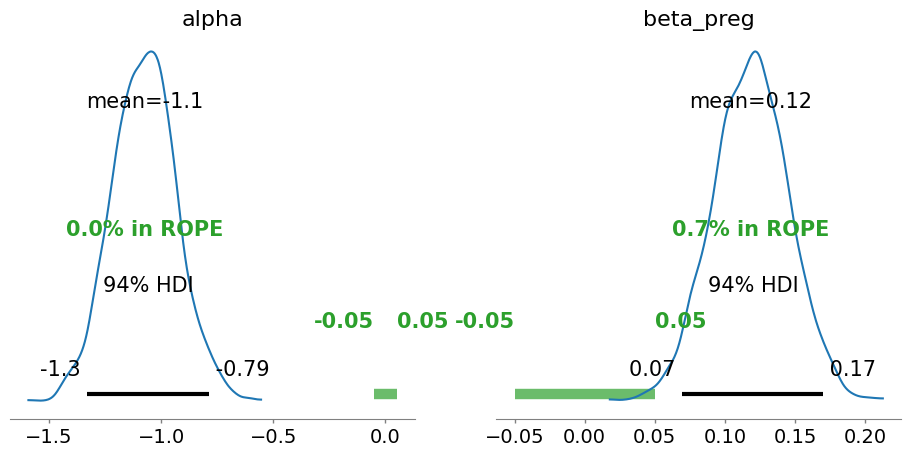

In [413]:
axes = az.plot_posterior(
    stan_data_simu_v1,
    var_names=["alpha", "beta_preg"],
    rope=(-0.05, 0.05),
    figsize=(11.5, 5),
)

The overlap percentage between each credible interval and ROPE region are used to ascertain statistical significance.\
An overlap percentage closer to zero indicates that the feature is significant in the model, while a value closer to 100% indicates that the model parameter is not statistically significant.

This means that the model does not have statistical significance.\
(But depending on how ROPE is decided, alpha and sigma could be accepted, while beta_preg is not)

- cite: An application of Bayesian inference to examine student retention and attrition in the STEM classroom (Robert et al., 2023)

### Second iteration

1. How would age directly affect diabetes? 
   - what is the likelihood of it?
2. Would elements without age affect diabetes? 


In [360]:
## normal distribution
## default flat prior

stan_code_age = """

data {
int<lower=0> N;
int<lower = 0, upper = 1> y[N];
vector[N] ages;
}


parameters {

//declare parameters that will be estimated

real alpha;
real beta_age;
}

model {
// Declare your probability model: priors, hyperpriors & likelihood

///prior 

vector[N] p;
alpha ~ normal(0,1);
p = ages * beta_age + alpha;

//likelihood
y ~ bernoulli_logit(p);
}

generated quantities {
//predictive posterior check

int<lower = 0, upper = 1> y_rep[N];

for(n in 1:N){

y_rep[n] = bernoulli_logit_rng(ages[n] * beta_age + alpha);

}
}
"""

In [361]:
## train
train_data_age = {
"N": len(train), 
"ages": train["Age"].values,
"y": train["Outcome"].values,   
}

In [362]:
stan_model_simu = stan.build(stan_code_age, data=train_data_age)

Building: 0.3s
Building: 0.4s
Building: 0.5s
Building: 0.7s
Building: 0.8s
Building: 0.9s
Building: 1.0s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.4s
Building: 1.5s
Building: 1.6s
Building: 1.7s
Building: 1.8s
Building: 1.9s
Building: 2.0s
Building: 2.1s
Building: 2.2s
Building: 2.3s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/qtdus6ka/model_qtdus6ka.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/chainable_object.hpp:6:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/typedefs.hpp:7:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-pac

Building: 2.4s
Building: 2.5s
Building: 2.6s
Building: 2.7s
Building: 2.8s
Building: 2.9s
Building: 3.0s
Building: 3.1s
Building: 3.2s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/qtdus6ka/model_qtdus6ka.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:26:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/beta.hpp:70:32: warning: lambda capture 'b' is not used [-Wunused-lambda-capture]
                           [a, b, digamma_ab](auto& vi) mutable {
                             ~~^


Building: 3.3s
Building: 3.5s
Building: 3.6s
Building: 3.7s
Building: 3.8s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/qtdus6ka/model_qtdus6ka.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:55:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/

Building: 3.9s
Building: 4.0s
Building: 4.1s
Building: 4.2s
Building: 4.3s
Building: 4.4s
Building: 4.5s
Building: 4.6s
Building: 4.7s
Building: 4.8s
Building: 4.9s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/qtdus6ka/model_qtdus6ka.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:198:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor.hpp:12:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor/hcubature.hpp:468:7: warning: unused variable 'kdiv' [-Wunused-variable]
  int kdiv = kdivide;
      ^


Building: 5.0s
Building: 5.1s
Building: 5.2s
Building: 5.3s
Building: 5.4s
Building: 5.5s
Building: 5.7s
Building: 5.8s
Building: 5.9s
Building: 6.0s
Building: 6.1s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/qtdus6ka/model_qtdus6ka.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:198:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor.hpp:15:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor/integrate_ode_rk45.hpp:6:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-

Building: 6.2s
Building: 6.3s
Building: 6.4s
Building: 6.5s
Building: 6.6s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/qtdus6ka/model_qtdus6ka.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:14:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:128:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/gaussian_dlm_obs_rng.hpp:98:7: warning: unused variable 'n' [-Wunused-variable]
  int n = G.rows();  // number of states
      ^


Building: 6.7s
Building: 6.8s
Building: 6.9s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/qtdus6ka/model_qtdus6ka.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:14:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:210:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/multi_student_t_log.hpp:5:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan

Building: 7.0s
Building: 7.1s
Building: 7.2s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/qtdus6ka/model_qtdus6ka.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:14:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:312:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/skew_double_exponential_ccdf_log.hpp:5:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan

Building: 7.3s
Building: 7.4s
Building: 7.5s
Building: 7.6s
Building: 7.7s
Building: 7.8s
Building: 7.9s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/qtdus6ka/model_qtdus6ka.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:55:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/

Building: 8.0s
Building: 8.1s
Building: 8.2s
Building: 8.3s
Building: 8.4s


/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp:192:12: warning: unused variable 'pre_mult' [-Wunused-variable]
      auto pre_mult = a2 * pow(1 - z, -1 - a2);
           ^
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp:307:20: note: in instantiation of function template specialization 'stan::math::internal::grad_2F1_impl<true, true, true, true, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, std::tuple<stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>>>' requested here
  return internal::grad_2F1_impl<true, true, true, true>(a1, a2, b1, z,
                   ^
In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/qtdus6ka/model_qtdus6ka.cpp:2:
In file i

Building: 8.5s
Building: 8.6s
Building: 8.7s
Building: 8.8s
Building: 8.9s
Building: 9.0s
Building: 9.2s
Building: 9.3s
Building: 9.4s
Building: 9.5s
Building: 9.6s
Building: 9.7s
Building: 9.8s
Building: 9.9s
Building: 10.0s
Building: 10.1s
Building: 10.2s
Building: 10.3s
Building: 10.4s
Building: 10.5s
Building: 10.6s
Building: 10.7s
Building: 10.8s
Building: 10.9s
Building: 11.0s
Building: 11.1s
Building: 11.2s
Building: 11.3s
Building: 11.4s
Building: 11.5s
Building: 11.6s
Building: 11.7s
Building: 11.8s
Building: 11.9s
Building: 12.0s
Building: 12.1s
Building: 12.2s
Building: 12.3s
Building: 12.4s
Building: 12.6s
Building: 12.7s
Building: 12.8s
Building: 12.9s


21 warnings generated.
ld: warning: object file (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/stan_services.o) was built for newer macOS version (11.0) than being linked (10.9)
ld: warning: dylib (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libtbb.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: dylib (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libtbbmalloc.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: dylib (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libtbbmalloc_proxy.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: object file (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libsundials_nvecserial.a(nvector_serial.o)) was built for newer macOS version (11.0) than being linked (10.9)
ld: warning: ob

In [363]:
fit_age = stan_model_simu.sample(num_chains=4, num_samples=1000, num_warmup=500) 
## posterior: Stan generates samples from the joint posterior distribution of the parameters

Sampling:   0%
Sampling:   0% (1/6000)
Sampling:   5% (301/6000)
Sampling:  30% (1801/6000)
Sampling:  55% (3301/6000)
Sampling:  80% (4800/6000)
Sampling: 100% (6000/6000)
Sampling: 100% (6000/6000), done.
Messages received during sampling:
  Gradient evaluation took 0.001672 seconds
  1000 transitions using 10 leapfrog steps per transition would take 16.72 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001917 seconds
  1000 transitions using 10 leapfrog steps per transition would take 19.17 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001593 seconds
  1000 transitions using 10 leapfrog steps per transition would take 15.93 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.003262 seconds
  1000 transitions using 10 leapfrog steps per transition would take 32.62 seconds.
  Adjust your expectations accordingly!


In [364]:
fit_age.to_frame()

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_age,y_rep.1,...,y_rep.528,y_rep.529,y_rep.530,y_rep.531,y_rep.532,y_rep.533,y_rep.534,y_rep.535,y_rep.536,y_rep.537
draws,,,,,,,,,,,,,,,,,,,,,
0,-333.738011,1.000000,0.219234,2.0,3.0,0.0,334.307778,-2.202853,0.046917,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
1,-333.188005,0.981676,0.242328,3.0,15.0,0.0,333.719005,-1.935183,0.039693,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-333.911740,0.946822,0.231547,2.0,7.0,0.0,334.387464,-2.117080,0.040788,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-333.122234,0.999933,0.230043,3.0,11.0,0.0,333.171636,-1.939475,0.038960,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-333.498280,0.999216,0.219234,2.0,7.0,0.0,334.173465,-2.161353,0.045001,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-333.207547,0.942130,0.230043,3.0,15.0,0.0,333.684918,-2.038570,0.041252,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3996,-334.321542,0.995706,0.219234,3.0,7.0,0.0,334.383900,-2.317076,0.047061,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3997,-333.490481,0.972254,0.242328,3.0,13.0,0.0,333.763815,-1.773731,0.036209,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0


In [365]:
summary_age = az.summary(fit_age) #https://python.arviz.org/en/stable/getting_started/Introduction.html

In [366]:
summary_age

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-1.941,0.276,-2.428,-1.398,0.010,0.007,706.0,830.0,1.0
beta_age,0.039,0.008,0.025,0.053,0.000,0.000,724.0,857.0,1.0
y_rep[0],0.276,0.447,0.000,1.000,0.007,0.005,3870.0,3870.0,1.0
y_rep[1],0.599,0.490,0.000,1.000,0.008,0.006,3929.0,3929.0,1.0
y_rep[2],0.314,0.464,0.000,1.000,0.007,0.005,3949.0,3949.0,1.0
...,...,...,...,...,...,...,...,...,...
y_rep[532],0.288,0.453,0.000,1.000,0.007,0.005,4029.0,4000.0,1.0
y_rep[533],0.282,0.450,0.000,1.000,0.007,0.005,3655.0,3655.0,1.0
y_rep[534],0.328,0.470,0.000,1.000,0.007,0.005,4189.0,4000.0,1.0
y_rep[535],0.529,0.499,0.000,1.000,0.008,0.006,3922.0,3922.0,1.0


In [367]:
stan_data_simu_age = az.from_pystan(
    posterior=fit_age,
    posterior_predictive="y_rep",
    observed_data=["y"],
    posterior_model=stan_model_simu,
    coords={"y_rep": np.arange(train_data_age["N"])},
)

In [368]:
check_treedepth(stan_data_simu_age)

0 of 4000 iterations saturated the maximum tree depth of 10 (0.0%)


In [369]:
check_div(stan_data_simu_age)

0 of 4000 iterations ended with a divergence (0.0%)


In [370]:
print(summary_age[summary_age['r_hat'] > 1.0])

Empty DataFrame
Columns: [mean, sd, hdi_3%, hdi_97%, mcse_mean, mcse_sd, ess_bulk, ess_tail, r_hat]
Index: []


plot comparison between prior and posterior to see how you accurate 
what plot distribution look like to get sense of how the prediction will be. 
get insight 

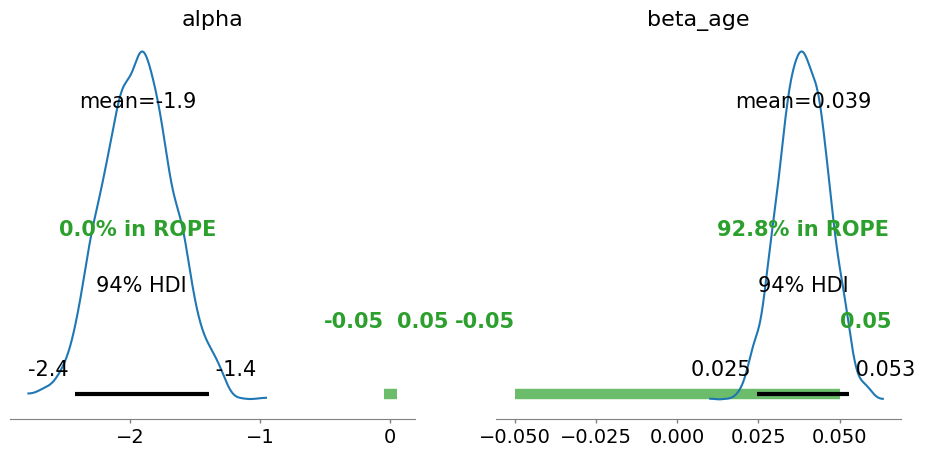

In [412]:
axes = az.plot_posterior(
    stan_data_simu_age,
    var_names=["alpha", "beta_age"],
    rope=(-0.05, 0.05),
    figsize=(11.5, 5),
)

## Third iteration

In the third iteration, I combined all factors to build logistic regression

In [389]:
## normal distribution
## default flat prior

stan_code_comb = """

data {
int<lower=0> N;
int<lower = 0, upper = 1> y[N];
vector[N] ages;
vector[N] pregnancies;
}


parameters {

//declare parameters that will be estimated

real alpha;
real beta_age;
real beta_preg;
}

model {
// Declare your probability model: priors, hyperpriors & likelihood

///prior 

vector[N] p;
alpha ~ normal(0,1);

p = ages * beta_age + pregnancies * beta_preg + alpha;

//likelihood
y ~ bernoulli_logit(p);
}

generated quantities {
//predictive posterior check

int<lower = 0, upper = 1> y_rep[N];

for(n in 1:N){

y_rep[n] = bernoulli_logit_rng(ages[n] * beta_age + pregnancies[n] * beta_preg + alpha);

}
}
"""

In [390]:
## train
train_data_comb = {
"N": len(train), 
"pregnancies": train["Pregnancies"].values,
"ages": train["Age"].values,
"y": train["Outcome"].values,   
}

In [391]:
stan_model_comb = stan.build(stan_code_comb, data=train_data_comb)

Building: 0.3s
Building: 0.4s
Building: 0.5s
Building: 0.6s
Building: 0.7s
Building: 0.9s
Building: 1.0s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.4s
Building: 1.5s
Building: 1.6s
Building: 1.7s
Building: 1.8s
Building: 1.9s
Building: 2.0s
Building: 2.1s
Building: 2.2s
Building: 2.3s
Building: 2.4s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/y26naahd/model_y26naahd.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/chainable_object.hpp:6:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/typedefs.hpp:7:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-pac

Building: 2.5s
Building: 2.6s
Building: 2.7s
Building: 2.9s
Building: 3.0s
Building: 3.1s
Building: 3.2s
Building: 3.3s
Building: 3.4s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/y26naahd/model_y26naahd.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:26:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/beta.hpp:70:32: warning: lambda capture 'b' is not used [-Wunused-lambda-capture]
                           [a, b, digamma_ab](auto& vi) mutable {
                             ~~^


Building: 3.5s
Building: 3.6s
Building: 3.7s
Building: 3.8s
Building: 3.9s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/y26naahd/model_y26naahd.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:55:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/

Building: 4.0s
Building: 4.1s
Building: 4.2s
Building: 4.3s
Building: 4.4s
Building: 4.5s
Building: 4.6s
Building: 4.7s
Building: 4.8s
Building: 4.9s
Building: 5.0s
Building: 5.1s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/y26naahd/model_y26naahd.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:198:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor.hpp:12:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor/hcubature.hpp:468:7: warning: unused variable 'kdiv' [-Wunused-variable]
  int kdiv = kdivide;
      ^


Building: 5.2s
Building: 5.3s
Building: 5.4s
Building: 5.5s
Building: 5.6s
Building: 5.7s
Building: 5.9s
Building: 6.0s
Building: 6.1s
Building: 6.2s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/y26naahd/model_y26naahd.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:198:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor.hpp:15:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor/integrate_ode_rk45.hpp:6:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-

Building: 6.3s
Building: 6.4s
Building: 6.5s
Building: 6.6s
Building: 6.7s
Building: 6.8s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/y26naahd/model_y26naahd.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:14:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:128:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/gaussian_dlm_obs_rng.hpp:98:7: warning: unused variable 'n' [-Wunused-variable]
  int n = G.rows();  // number of states
      ^


Building: 6.9s
Building: 7.0s
Building: 7.1s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/y26naahd/model_y26naahd.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:14:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:210:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/multi_student_t_log.hpp:5:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan

Building: 7.2s
Building: 7.3s
Building: 7.4s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/y26naahd/model_y26naahd.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:14:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:312:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/skew_double_exponential_ccdf_log.hpp:5:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan

Building: 7.5s
Building: 7.6s
Building: 7.7s
Building: 7.8s
Building: 7.9s
Building: 8.0s
Building: 8.1s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/y26naahd/model_y26naahd.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:55:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/

Building: 8.2s
Building: 8.3s
Building: 8.4s
Building: 8.6s
Building: 8.7s


/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp:192:12: warning: unused variable 'pre_mult' [-Wunused-variable]
      auto pre_mult = a2 * pow(1 - z, -1 - a2);
           ^
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp:307:20: note: in instantiation of function template specialization 'stan::math::internal::grad_2F1_impl<true, true, true, true, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, std::tuple<stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>>>' requested here
  return internal::grad_2F1_impl<true, true, true, true>(a1, a2, b1, z,
                   ^
In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/y26naahd/model_y26naahd.cpp:2:
In file i

Building: 8.8s
Building: 8.9s
Building: 9.0s
Building: 9.1s
Building: 9.2s
Building: 9.3s
Building: 9.4s
Building: 9.5s
Building: 9.6s
Building: 9.7s
Building: 9.8s
Building: 9.9s
Building: 10.0s
Building: 10.1s
Building: 10.2s
Building: 10.3s
Building: 10.4s
Building: 10.5s
Building: 10.6s
Building: 10.7s
Building: 10.8s
Building: 10.9s
Building: 11.0s
Building: 11.1s
Building: 11.2s
Building: 11.3s
Building: 11.4s
Building: 11.5s
Building: 11.6s
Building: 11.7s
Building: 11.9s
Building: 12.0s
Building: 12.1s
Building: 12.2s
Building: 12.3s
Building: 12.4s
Building: 12.5s
Building: 12.6s
Building: 12.7s
Building: 12.8s
Building: 12.9s
Building: 13.0s
Building: 13.1s
Building: 13.2s
Building: 13.3s
Building: 13.4s


21 warnings generated.
ld: warning: object file (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/stan_services.o) was built for newer macOS version (11.0) than being linked (10.9)
ld: warning: dylib (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libtbb.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: dylib (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libtbbmalloc_proxy.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: dylib (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libtbbmalloc.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: object file (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libsundials_nvecserial.a(nvector_serial.o)) was built for newer macOS version (11.0) than being linked (10.9)
ld: warning: ob

In [392]:
fit_comb = stan_model_comb.sample(num_chains=4, num_samples=1000, num_warmup=500) 
## posterior: Stan generates samples from the joint posterior distribution of the parameters

Sampling:   0%
Sampling:   0% (1/6000)
Sampling:   2% (101/6000)
Sampling:   3% (201/6000)
Sampling:   5% (301/6000)
Sampling:  30% (1800/6000)
Sampling:  53% (3200/6000)
Sampling:  77% (4600/6000)
Sampling: 100% (6000/6000)
Sampling: 100% (6000/6000), done.
Messages received during sampling:
  Gradient evaluation took 0.002409 seconds
  1000 transitions using 10 leapfrog steps per transition would take 24.09 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.002265 seconds
  1000 transitions using 10 leapfrog steps per transition would take 22.65 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.002371 seconds
  1000 transitions using 10 leapfrog steps per transition would take 23.71 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.002423 seconds
  1000 transitions using 10 leapfrog steps per transition would take 24.23 seconds.
  Adjust your expectations accordingly!


In [393]:
fit_comb.to_frame()

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_age,beta_preg,...,y_rep.528,y_rep.529,y_rep.530,y_rep.531,y_rep.532,y_rep.533,y_rep.534,y_rep.535,y_rep.536,y_rep.537
draws,,,,,,,,,,,,,,,,,,,,,
0,-329.522347,1.000000,0.206750,2.0,3.0,0.0,329.647249,-1.605467,0.015599,0.105137,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-329.181622,0.999458,0.216335,4.0,31.0,0.0,330.104632,-1.804625,0.025851,0.070112,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,-330.716933,0.604720,0.190982,2.0,3.0,0.0,333.933845,-1.522695,0.018446,0.108488,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-330.433007,0.969068,0.247005,3.0,11.0,0.0,332.110138,-1.673364,0.027058,0.042194,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-329.750211,0.944113,0.206750,4.0,31.0,0.0,330.997815,-1.736038,0.024893,0.058333,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-331.910696,0.872079,0.247005,4.0,23.0,0.0,332.914046,-1.632046,0.011665,0.108493,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3996,-331.428116,0.969988,0.206750,4.0,31.0,0.0,333.123246,-1.874624,0.014900,0.155512,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3997,-331.522554,0.994785,0.216335,5.0,31.0,0.0,331.546295,-1.576178,0.026626,0.031047,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [395]:
summary_comb = az.summary(fit_comb) #https://python.arviz.org/en/stable/getting_started/Introduction.html

In [396]:
summary_comb

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-1.870,0.281,-2.368,-1.325,0.007,0.005,1472.0,1522.0,1.0
beta_age,0.026,0.009,0.009,0.043,0.000,0.000,1442.0,1652.0,1.0
beta_preg,0.093,0.032,0.032,0.153,0.001,0.001,1704.0,1723.0,1.0
y_rep[0],0.239,0.427,0.000,1.000,0.007,0.005,3747.0,3747.0,1.0
y_rep[1],0.524,0.499,0.000,1.000,0.008,0.006,3878.0,3878.0,1.0
...,...,...,...,...,...,...,...,...,...
y_rep[532],0.220,0.414,0.000,1.000,0.007,0.005,3974.0,3974.0,1.0
y_rep[533],0.221,0.415,0.000,1.000,0.007,0.005,3476.0,3476.0,1.0
y_rep[534],0.241,0.428,0.000,1.000,0.007,0.005,4039.0,4000.0,1.0
y_rep[535],0.432,0.495,0.000,1.000,0.008,0.005,4105.0,4000.0,1.0


In [399]:
## normal distribution
## default flat prior

stan_code_comb_v2 = """

data {
int<lower=0> N;
int<lower = 0, upper = 1> y[N];
vector[N] ages;
vector[N] pregnancies;
}


parameters {

//declare parameters that will be estimated

real alpha;
real beta_age;
real beta_preg;
}

model {
// Declare your probability model: priors, hyperpriors & likelihood

///prior 

vector[N] p;
alpha ~ normal(0,1);
beta_age ~ normal(0,10);
beta_preg ~ normal(0,10);

p = ages * beta_age + pregnancies * beta_preg + alpha;

//likelihood
y ~ bernoulli_logit(p);
}

generated quantities {
//predictive posterior check

int<lower = 0, upper = 1> y_rep[N];

for(n in 1:N){

y_rep[n] = bernoulli_logit_rng(ages[n] * beta_age + pregnancies[n] * beta_preg + alpha);

}
}
"""

In [400]:
stan_model_comb_v2 = stan.build(stan_code_comb_v2, data=train_data_comb)

Building: 0.2s
Building: 0.3s
Building: 0.4s
Building: 0.5s
Building: 0.6s
Building: 0.7s
Building: 0.8s
Building: 0.9s
Building: 1.0s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.4s
Building: 1.6s
Building: 1.7s
Building: 1.8s
Building: 1.9s
Building: 2.0s
Building: 2.1s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/a7pa4hp5/model_a7pa4hp5.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/chainable_object.hpp:6:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/typedefs.hpp:7:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-pac

Building: 2.2s
Building: 2.3s
Building: 2.4s
Building: 2.5s
Building: 2.6s
Building: 2.7s
Building: 2.8s
Building: 2.9s
Building: 3.0s
Building: 3.1s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/a7pa4hp5/model_a7pa4hp5.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:26:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/beta.hpp:70:32: warning: lambda capture 'b' is not used [-Wunused-lambda-capture]
                           [a, b, digamma_ab](auto& vi) mutable {
                             ~~^


Building: 3.2s
Building: 3.3s
Building: 3.4s
Building: 3.5s
Building: 3.6s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/a7pa4hp5/model_a7pa4hp5.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:55:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/

Building: 3.7s
Building: 3.9s
Building: 4.0s
Building: 4.1s
Building: 4.2s
Building: 4.3s
Building: 4.4s
Building: 4.5s
Building: 4.6s
Building: 4.7s
Building: 4.8s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/a7pa4hp5/model_a7pa4hp5.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:198:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor.hpp:12:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor/hcubature.hpp:468:7: warning: unused variable 'kdiv' [-Wunused-variable]
  int kdiv = kdivide;
      ^


Building: 4.9s
Building: 5.0s
Building: 5.1s
Building: 5.2s
Building: 5.3s
Building: 5.4s
Building: 5.5s
Building: 5.6s
Building: 5.7s
Building: 5.8s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/a7pa4hp5/model_a7pa4hp5.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:198:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor.hpp:15:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor/integrate_ode_rk45.hpp:6:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-

Building: 5.9s
Building: 6.0s
Building: 6.1s
Building: 6.2s
Building: 6.3s
Building: 6.4s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/a7pa4hp5/model_a7pa4hp5.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:14:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:128:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/gaussian_dlm_obs_rng.hpp:98:7: warning: unused variable 'n' [-Wunused-variable]
  int n = G.rows();  // number of states
      ^


Building: 6.5s
Building: 6.6s
Building: 6.7s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/a7pa4hp5/model_a7pa4hp5.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:14:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:210:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/multi_student_t_log.hpp:5:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan

Building: 6.8s
Building: 6.9s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/a7pa4hp5/model_a7pa4hp5.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:14:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:312:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/skew_double_exponential_ccdf_log.hpp:5:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan

Building: 7.1s
Building: 7.2s
Building: 7.3s
Building: 7.4s
Building: 7.5s
Building: 7.6s
Building: 7.7s
Building: 7.8s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/a7pa4hp5/model_a7pa4hp5.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:55:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/

Building: 7.9s
Building: 8.0s
Building: 8.1s
Building: 8.2s
Building: 8.3s


/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp:192:12: warning: unused variable 'pre_mult' [-Wunused-variable]
      auto pre_mult = a2 * pow(1 - z, -1 - a2);
           ^
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp:307:20: note: in instantiation of function template specialization 'stan::math::internal::grad_2F1_impl<true, true, true, true, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, std::tuple<stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>>>' requested here
  return internal::grad_2F1_impl<true, true, true, true>(a1, a2, b1, z,
                   ^
In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/a7pa4hp5/model_a7pa4hp5.cpp:2:
In file i

Building: 8.4s
Building: 8.5s
Building: 8.6s
Building: 8.7s
Building: 8.8s
Building: 8.9s
Building: 9.0s
Building: 9.1s
Building: 9.2s
Building: 9.3s
Building: 9.5s
Building: 9.6s
Building: 9.7s
Building: 9.8s
Building: 9.9s
Building: 10.0s
Building: 10.1s
Building: 10.2s
Building: 10.3s
Building: 10.4s
Building: 10.5s
Building: 10.6s
Building: 10.7s
Building: 10.8s
Building: 10.9s
Building: 11.0s
Building: 11.1s
Building: 11.2s
Building: 11.3s
Building: 11.4s
Building: 11.5s
Building: 11.6s
Building: 11.7s
Building: 11.9s
Building: 12.0s
Building: 12.1s
Building: 12.2s
Building: 12.3s
Building: 12.4s
Building: 12.5s
Building: 12.6s
Building: 12.7s
Building: 12.8s
Building: 12.9s
Building: 13.0s
Building: 13.1s


21 warnings generated.
ld: warning: object file (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/stan_services.o) was built for newer macOS version (11.0) than being linked (10.9)
ld: warning: dylib (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libtbb.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: dylib (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libtbbmalloc_proxy.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: dylib (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libtbbmalloc.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: object file (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libsundials_nvecserial.a(nvector_serial.o)) was built for newer macOS version (11.0) than being linked (10.9)
ld: warning: ob

In [401]:
fit_comb_v2 = stan_model_comb_v2.sample(num_chains=4, num_samples=1000, num_warmup=500) 
## posterior: Stan generates samples from the joint posterior distribution of the parameters

Sampling:   0%
Sampling:   0% (1/6000)
Sampling:   5% (301/6000)
Sampling:   7% (401/6000)
Sampling:  32% (1901/6000)
Sampling:  57% (3400/6000)
Sampling:  77% (4600/6000)
Sampling: 100% (6000/6000)
Sampling: 100% (6000/6000), done.
Messages received during sampling:
  Gradient evaluation took 0.002944 seconds
  1000 transitions using 10 leapfrog steps per transition would take 29.44 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.003074 seconds
  1000 transitions using 10 leapfrog steps per transition would take 30.74 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.002583 seconds
  1000 transitions using 10 leapfrog steps per transition would take 25.83 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.002352 seconds
  1000 transitions using 10 leapfrog steps per transition would take 23.52 seconds.
  Adjust your expectations accordingly!


In [402]:
fit_comb_v2.to_frame()

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_age,beta_preg,...,y_rep.528,y_rep.529,y_rep.530,y_rep.531,y_rep.532,y_rep.533,y_rep.534,y_rep.535,y_rep.536,y_rep.537
draws,,,,,,,,,,,,,,,,,,,,,
0,-333.492521,0.998736,0.172076,3.0,9.0,0.0,334.657822,-1.774122,0.015685,0.090469,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-329.477557,0.973758,0.207195,5.0,31.0,0.0,333.341443,-1.721120,0.018814,0.124873,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-329.900580,0.842712,0.168675,3.0,15.0,0.0,331.590441,-2.019748,0.026513,0.089348,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-329.451866,0.994200,0.191453,4.0,15.0,0.0,330.931209,-1.941435,0.032331,0.059010,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,-332.286360,0.988072,0.172076,3.0,15.0,0.0,336.650566,-1.868613,0.018542,0.171387,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-329.486022,0.961005,0.191453,2.0,7.0,0.0,329.830124,-1.606830,0.018195,0.109258,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3996,-332.370191,0.910407,0.172076,4.0,21.0,0.0,334.442738,-2.546224,0.040775,0.089867,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3997,-329.711931,0.998465,0.207195,3.0,15.0,0.0,331.891724,-2.176880,0.033701,0.103513,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [403]:
summary_comb_v2 = az.summary(fit_comb_v2) #https://python.arviz.org/en/stable/getting_started/Introduction.html

/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


In [404]:
summary_comb_v2

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-1.872,0.276,-2.384,-1.355,0.007,0.005,1528.0,1596.0,1.0
beta_age,0.025,0.009,0.010,0.042,0.000,0.000,1420.0,1505.0,1.0
beta_preg,0.095,0.032,0.033,0.151,0.001,0.001,1698.0,1569.0,1.0
y_rep[0],0.243,0.429,0.000,1.000,0.007,0.005,3838.0,3838.0,1.0
y_rep[1],0.546,0.498,0.000,1.000,0.008,0.006,3567.0,3567.0,1.0
...,...,...,...,...,...,...,...,...,...
y_rep[532],0.232,0.422,0.000,1.000,0.007,0.005,4078.0,4000.0,1.0
y_rep[533],0.219,0.413,0.000,1.000,0.006,0.004,4264.0,4000.0,1.0
y_rep[534],0.239,0.426,0.000,1.000,0.007,0.005,3812.0,3812.0,1.0
y_rep[535],0.414,0.493,0.000,1.000,0.008,0.006,3780.0,3780.0,1.0


In [406]:
stan_data_simu_comb = az.from_pystan(
    posterior=fit_comb_v2,
    posterior_predictive="y_rep",
    observed_data=["y"],
    posterior_model=stan_model_comb_v2,
    coords={"y_rep": np.arange(train_data_comb["N"])},
)

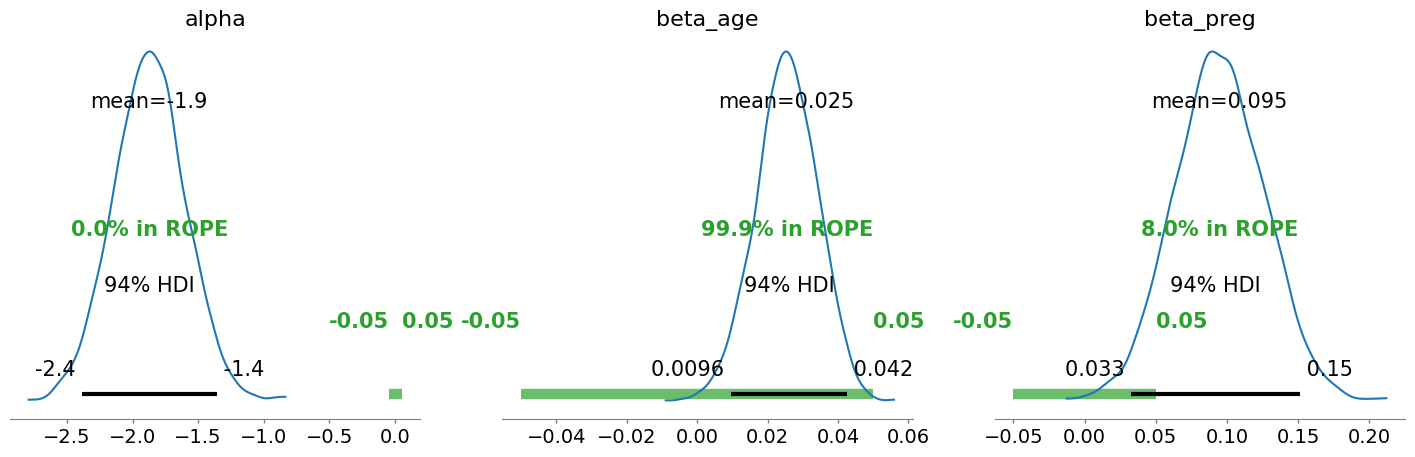

In [411]:
axes = az.plot_posterior(
    stan_data_simu_comb,
    var_names=["alpha", "beta_age", "beta_preg"],
    rope=(-0.05, 0.05),
    figsize=(18, 5),
)

In [420]:
## normal distribution
## default flat prior

stan_code_comb_v3 = """

data {
int<lower=0> N;
int<lower = 0, upper = 1> y[N];
vector[N] ages;
vector[N] pregnancies;
}


parameters {

//declare parameters that will be estimated

real alpha;
real beta_age;
real beta_preg;
}

model {
// Declare your probability model: priors, hyperpriors & likelihood

///prior 

vector[N] p;
alpha ~ normal(0,5);
beta_age ~ normal(0,5);
beta_preg ~ normal(0,5);

p = ages * beta_age + pregnancies * beta_preg + alpha;

//likelihood
y ~ bernoulli_logit(p);
}

generated quantities {
//predictive posterior check

int<lower = 0, upper = 1> y_rep[N];

for(n in 1:N){

y_rep[n] = bernoulli_logit_rng(ages[n] * beta_age + pregnancies[n] * beta_preg + alpha);

}
}
"""

In [421]:
stan_model_comb_v3 = stan.build(stan_code_comb_v3, data=train_data_comb)

Building: 0.2s
Building: 0.3s
Building: 0.4s
Building: 0.5s
Building: 0.6s
Building: 0.7s
Building: 0.8s
Building: 0.9s
Building: 1.0s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.5s
Building: 1.6s
Building: 1.7s
Building: 1.8s
Building: 1.9s
Building: 2.0s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/2teph3oc/model_2teph3oc.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:8:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/chainable_object.hpp:6:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/core/typedefs.hpp:7:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-pac

Building: 2.1s
Building: 2.2s
Building: 2.3s
Building: 2.4s
Building: 2.5s
Building: 2.6s
Building: 2.7s
Building: 2.8s
Building: 2.9s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/2teph3oc/model_2teph3oc.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:26:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/beta.hpp:70:32: warning: lambda capture 'b' is not used [-Wunused-lambda-capture]
                           [a, b, digamma_ab](auto& vi) mutable {
                             ~~^


Building: 3.0s
Building: 3.1s
Building: 3.2s
Building: 3.3s
Building: 3.4s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/2teph3oc/model_2teph3oc.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:55:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/

Building: 3.5s
Building: 3.6s
Building: 3.7s
Building: 3.8s
Building: 3.9s
Building: 4.0s
Building: 4.1s
Building: 4.3s
Building: 4.4s
Building: 4.5s
Building: 4.6s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/2teph3oc/model_2teph3oc.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:198:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor.hpp:12:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor/hcubature.hpp:468:7: warning: unused variable 'kdiv' [-Wunused-variable]
  int kdiv = kdivide;
      ^


Building: 4.7s
Building: 4.8s
Building: 4.9s
Building: 5.0s
Building: 5.1s
Building: 5.2s
Building: 5.3s
Building: 5.4s
Building: 5.5s
Building: 5.6s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/2teph3oc/model_2teph3oc.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:198:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor.hpp:15:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/functor/integrate_ode_rk45.hpp:6:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-

Building: 5.7s
Building: 5.8s
Building: 5.9s
Building: 6.0s
Building: 6.1s
Building: 6.2s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/2teph3oc/model_2teph3oc.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:14:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:128:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/gaussian_dlm_obs_rng.hpp:98:7: warning: unused variable 'n' [-Wunused-variable]
  int n = G.rows();  // number of states
      ^


Building: 6.3s
Building: 6.4s
Building: 6.5s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/2teph3oc/model_2teph3oc.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:14:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:210:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/multi_student_t_log.hpp:5:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan

Building: 6.6s
Building: 6.8s
Building: 6.9s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/2teph3oc/model_2teph3oc.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:14:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim.hpp:16:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob.hpp:312:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/prob/skew_double_exponential_ccdf_log.hpp:5:
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan

Building: 7.0s
Building: 7.1s
Building: 7.2s
Building: 7.3s
Building: 7.4s
Building: 7.5s
Building: 7.6s


In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/2teph3oc/model_2teph3oc.cpp:2:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun.hpp:55:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/elt_multiply.hpp:9:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/rev/fun/multiply.hpp:7:
In file included from /Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/

Building: 7.7s
Building: 7.8s
Building: 7.9s
Building: 8.0s
Building: 8.1s


/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp:192:12: warning: unused variable 'pre_mult' [-Wunused-variable]
      auto pre_mult = a2 * pow(1 - z, -1 - a2);
           ^
/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/include/stan/math/prim/fun/grad_2F1.hpp:307:20: note: in instantiation of function template specialization 'stan::math::internal::grad_2F1_impl<true, true, true, true, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, std::tuple<stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>, stan::math::var_value<double>>>' requested here
  return internal::grad_2F1_impl<true, true, true, true>(a1, a2, b1, z,
                   ^
In file included from /Users/eunkang/Library/Caches/httpstan/4.10.1/models/2teph3oc/model_2teph3oc.cpp:2:
In file i

Building: 8.2s
Building: 8.3s
Building: 8.4s
Building: 8.5s
Building: 8.6s
Building: 8.7s
Building: 8.8s
Building: 8.9s
Building: 9.0s
Building: 9.1s
Building: 9.2s
Building: 9.3s
Building: 9.5s
Building: 9.6s
Building: 9.7s
Building: 9.8s
Building: 9.9s
Building: 10.0s
Building: 10.1s
Building: 10.2s
Building: 10.3s
Building: 10.4s
Building: 10.5s
Building: 10.6s
Building: 10.7s
Building: 10.8s
Building: 10.9s
Building: 11.0s
Building: 11.1s
Building: 11.2s
Building: 11.3s
Building: 11.4s
Building: 11.5s
Building: 11.6s
Building: 11.7s
Building: 11.8s
Building: 11.9s
Building: 12.0s
Building: 12.1s
Building: 12.2s
Building: 12.4s
Building: 12.5s
Building: 12.6s
Building: 12.7s
Building: 12.8s
Building: 12.9s


21 warnings generated.
ld: warning: object file (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/stan_services.o) was built for newer macOS version (11.0) than being linked (10.9)
ld: warning: dylib (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libtbb.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: dylib (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libtbbmalloc_proxy.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: dylib (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libtbbmalloc.dylib) was built for newer macOS version (10.11) than being linked (10.9)
ld: warning: object file (/Users/eunkang/opt/anaconda3/envs/stan/lib/python3.9/site-packages/httpstan/lib/libsundials_nvecserial.a(nvector_serial.o)) was built for newer macOS version (11.0) than being linked (10.9)
ld: warning: ob

In [422]:
fit_comb_v3 = stan_model_comb_v3.sample(num_chains=4, num_samples=1000, num_warmup=500) 
## posterior: Stan generates samples from the joint posterior distribution of the parameters

Sampling:   0%
Sampling:   0% (1/6000)
Sampling:   3% (201/6000)
Sampling:   5% (301/6000)
Sampling:  30% (1801/6000)
Sampling:  55% (3300/6000)
Sampling:  77% (4600/6000)
Sampling: 100% (6000/6000)
Sampling: 100% (6000/6000), done.
Messages received during sampling:
  Gradient evaluation took 0.001757 seconds
  1000 transitions using 10 leapfrog steps per transition would take 17.57 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001723 seconds
  1000 transitions using 10 leapfrog steps per transition would take 17.23 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.00226 seconds
  1000 transitions using 10 leapfrog steps per transition would take 22.6 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 0.001775 seconds
  1000 transitions using 10 leapfrog steps per transition would take 17.75 seconds.
  Adjust your expectations accordingly!


In [423]:
fit_comb_v3.to_frame()

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_age,beta_preg,...,y_rep.528,y_rep.529,y_rep.530,y_rep.531,y_rep.532,y_rep.533,y_rep.534,y_rep.535,y_rep.536,y_rep.537
draws,,,,,,,,,,,,,,,,,,,,,
0,-329.144001,1.000000,0.244684,4.0,15.0,0.0,331.852372,-2.392145,0.045277,0.039475,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-327.527124,0.936039,0.222853,4.0,15.0,0.0,329.042005,-2.010586,0.033789,0.061109,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-327.933820,0.971716,0.175314,3.0,15.0,0.0,328.350601,-1.976530,0.026204,0.083612,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-327.236573,0.949035,0.209885,3.0,15.0,0.0,331.248721,-2.099866,0.029404,0.108757,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-328.995389,0.749650,0.244684,3.0,11.0,0.0,331.916806,-2.340948,0.042355,0.089984,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-329.163396,0.997265,0.209885,3.0,7.0,0.0,329.322299,-1.761369,0.013942,0.138550,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3996,-329.211272,1.000000,0.244684,4.0,15.0,0.0,330.223177,-2.493896,0.036165,0.123466,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3997,-329.798714,0.992462,0.222853,4.0,23.0,0.0,330.640905,-1.772042,0.031105,0.024278,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [424]:
summary_comb_v3 = az.summary(fit_comb_v3) #https://python.arviz.org/en/stable/getting_started/Introduction.html

In [425]:
summary_comb_v3

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-2.013,0.295,-2.554,-1.462,0.008,0.005,1482.0,1591.0,1.0
beta_age,0.030,0.009,0.013,0.047,0.000,0.000,1320.0,1538.0,1.0
beta_preg,0.091,0.032,0.032,0.150,0.001,0.001,1617.0,1806.0,1.0
y_rep[0],0.238,0.426,0.000,1.000,0.007,0.005,3868.0,3868.0,1.0
y_rep[1],0.538,0.499,0.000,1.000,0.008,0.006,4056.0,4000.0,1.0
...,...,...,...,...,...,...,...,...,...
y_rep[532],0.220,0.414,0.000,1.000,0.007,0.005,4055.0,4000.0,1.0
y_rep[533],0.222,0.415,0.000,1.000,0.007,0.005,3891.0,3891.0,1.0
y_rep[534],0.253,0.435,0.000,1.000,0.007,0.005,3961.0,3961.0,1.0
y_rep[535],0.433,0.496,0.000,1.000,0.008,0.006,3556.0,3556.0,1.0


In [427]:
# Example usage
log_odds_value = summary_comb_v3['mean']['beta_preg']
probability = log_odds_to_probability(log_odds_value)
print(f"The probability corresponding to a log-odds value of {log_odds_value} is {probability}")


The probability corresponding to a log-odds value of 0.091 is 0.5227343135939515


In [428]:
# Example usage
log_odds_value = summary_comb_v3['mean']['beta_age']
probability = log_odds_to_probability(log_odds_value)
print(f"The probability corresponding to a log-odds value of {log_odds_value} is {probability}")


The probability corresponding to a log-odds value of 0.03 is 0.5074994375506203


In [429]:
stan_data_simu_comb = az.from_pystan(
    posterior=fit_comb_v3,
    posterior_predictive="y_rep",
    observed_data=["y"],
    posterior_model=stan_model_comb_v3,
    coords={"y_rep": np.arange(train_data_comb["N"])},
)

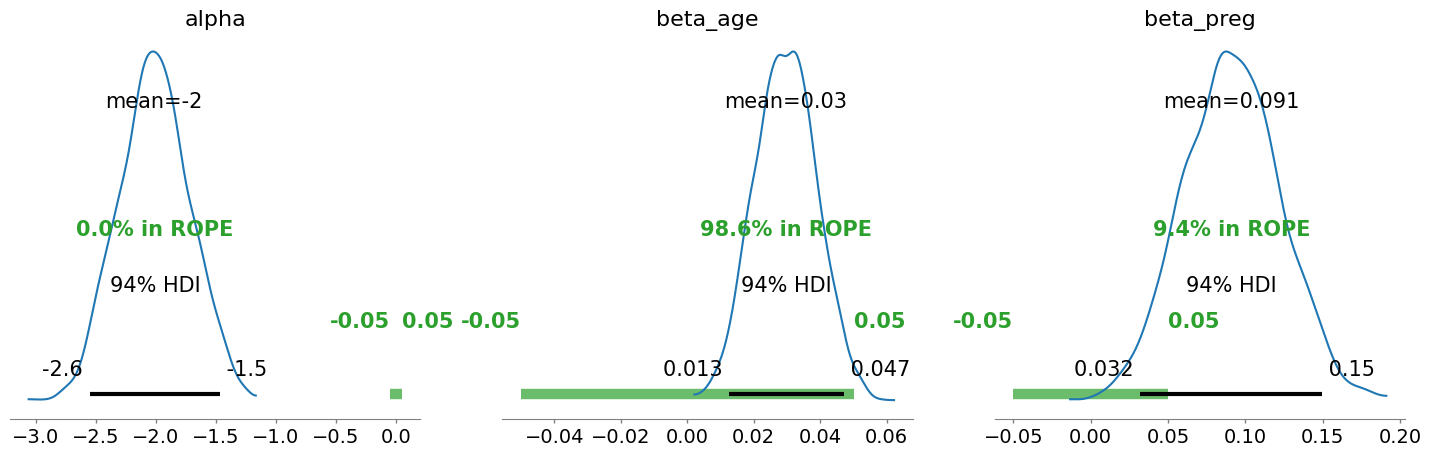

In [433]:
axes = az.plot_posterior(
    stan_data_simu_comb,
    var_names=["alpha", "beta_age", "beta_preg"],
    rope=(-0.05, 0.05),
    figsize=(18, 5),
)

<Axes: xlabel='y / y_rep'>

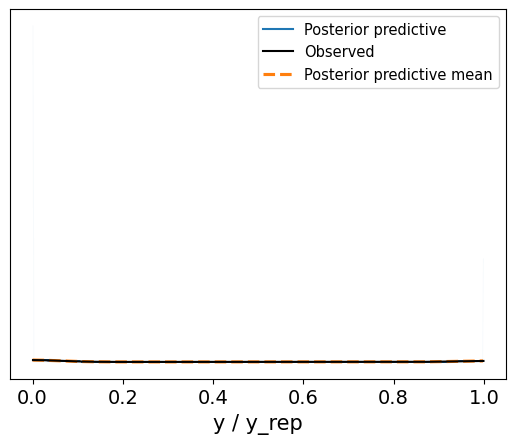

In [434]:
az.plot_ppc(stan_data_simu_comb, data_pairs={"y": "y_rep"}, alpha=0.03, textsize=14)

In [371]:
## train
train_data_comb = {
"N": len(df), 
"pregnancies": df.loc[:, "Pregnancies"].values,
"y": df.loc[:, "DiabetesPedigreeFunction"].values,   
}

In [ ]:
from faker import Faker # library for generating random num

faker = Faker()
Faker.seed(1000)

# Generate fake data
data_simu = {
    'Pregnancies': [faker.random_int(min=0, max=17) for _ in range(3000)],
    'Glucose': [faker.random_int(min=0, max=200) for _ in range(3000)],
    'BloodPressure': [faker.random_int(min=0, max=100) for _ in range(3000)],
    'SkinTickness': [faker.random_int(min=0, max=100) for _ in range(3000)],
    'Insulin': [faker.random_int() for _ in range(3000)],
    'BMI': [faker.random.uniform(a=0, b=67) for _ in range(3000)],
    'DiabetesPedigreeFunction': np.random.default_rng().gamma(1, 1, 3000),
    'Age': [faker.random_int(min=1, max=100) for _ in range(3000)],
    'Outcome': [faker.random_int(min=0, max=1) for _ in range(3000)]
}


# Create a DataFrame
df_simu = pd.DataFrame(data_simu)

# Display the DataFrame
df_simu.head()

/var/folders/37/wj6jtm190bz4csmcwzcscp440000gn/T/ipykernel_8904/278174999.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_simu.DiabetesPedigreeFunction,color='r', ax = ax1)
/var/folders/37/wj6jtm190bz4csmcwzcscp440000gn/T/ipykernel_8904/278174999.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

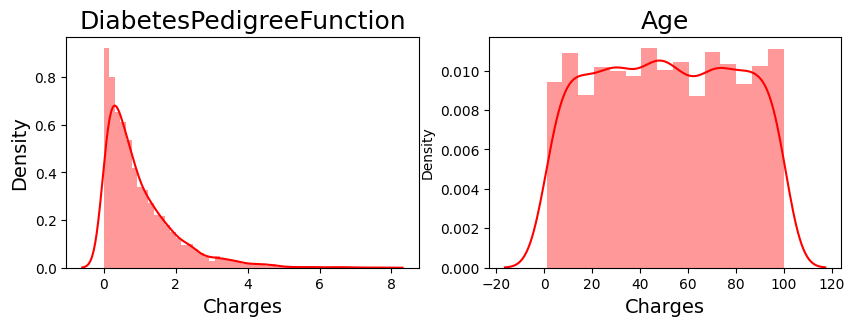

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))  # Adjust the size as needed
sns.distplot(df_simu.DiabetesPedigreeFunction,color='r', ax = ax1)
ax1.set_title('DiabetesPedigreeFunction',size=18)
ax1.set_xlabel('Charges',size=14)
ax1.set_ylabel('Density',size=14)

sns.distplot(df_simu.Age,color='r', ax = ax2)
ax2.set_title('Age',size=18)
ax2.set_xlabel('Charges',size=14)
plt.show()

In [426]:
import math

def log_odds_to_probability(log_odds):
    probability = 1 / (1 + math.exp(-log_odds))
    return probability


In [349]:
## diagnostic test with treedepth 

def check_treedepth(summary, max_treedepth = 10, quiet=False):
    """Check transitions that ended prematurely due to maximum tree depth limit"""
    # sampler_params = fit.get_sampler_params(inc_warmup=False)
    sampler_params = summary.sample_stats['tree_depth'].values
    depths = [x for y in sampler_params for x in y]
    n = sum(1 for x in depths if x == max_treedepth)
    N = len(depths)

    if not quiet:
        print(('{} of {} iterations saturated the maximum tree depth of {}'
              + ' ({}%)').format(n, N, max_treedepth, 100 * n / N))
    if n > 0:
        if not quiet:
            print('  Run again with max_treedepth set to a larger value to avoid saturation')
        else:
            return False
    else:
        if quiet:
            return True

In [355]:
## diagnostic test with divergence

def check_div(summary, quiet=False):
    """Check transitions that ended with a divergence"""
    sampler_params = summary.sample_stats['diverging'].values
    divergent = [x for y in sampler_params for x in y]
    # n = sum(divergent)
    divergent = [True if element == "True" else False for element in divergent]
    n = divergent.count(True)
    N = len(divergent)
    if not quiet:
        print('{} of {} iterations ended with a divergence ({}%)'.format(n, N,
            100 * n / N))

    if n > 0:
        if not quiet:
            print('  Try running with larger adapt_delta to remove the divergences')
        else:
            return False
    else:
        if quiet:
            return True

In [ ]:
## Prior

As seen in the graph, pregnancies data is skewed to the right with positive numbers. 
The data type is categorical (1,2,..).

In [162]:
# import the relevant modules
import shutil
import httpstan.models
import httpstan.cache

In [276]:
httpstan.cache.list_model_names()

['models/gcej5nte', 'models/fsnlkx3p']

In [279]:
httpstan.cache.delete_model_directory('models/gcej5nte') ## add the model pointer you want to remove

In [ ]:
# ## normalizing data
# means = np.mean(train, axis=0)
# stds = np.std(train, axis=0)
# trainData = (train - means)/stds
# testData = (test - means)/stds

# ztrain = (train - np.min(train)) / (np.max(train) - np.min(train))


# # np.mean(trainData, axis=0) => check that new means equal 0
# # np.std(trainData, axis=0) => check that new stds equal 1